In [1]:
import os
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')

C:\Users\hp


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv('hcltech.csv')
TempData.head(30)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.00,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.00,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.00,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.30,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.00,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
5,2000-01-18,HCLTECH,EQ,1801.65,1730.55,1815.00,1657.55,1775.00,1774.50,1716.39,359900,6.177280e+13,NaN,NaN,NaN
6,2000-01-19,HCLTECH,EQ,1774.50,1815.00,1889.00,1760.00,1842.80,1851.15,1842.81,316050,5.824204e+13,NaN,NaN,NaN
7,2000-01-20,HCLTECH,EQ,1851.15,1865.00,1865.00,1750.00,1753.50,1757.85,1801.37,204700,3.687409e+13,NaN,NaN,NaN
8,2000-01-21,HCLTECH,EQ,1757.85,1761.00,1815.00,1705.00,1786.00,1781.35,1774.01,282150,5.005360e+13,NaN,NaN,NaN
9,2000-01-24,HCLTECH,EQ,1781.35,1834.90,1923.90,1795.00,1923.90,1923.90,1875.34,328650,6.163317e+13,NaN,NaN,NaN


In [40]:
TempData.tail(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,forecast
5193,2020-11-23,HCLTECH,EQ,819.25,825.0,842.0,816.25,838.50,839.20,832.35,7116516,5.923459e+14,139507.0,2607441.0,0.3664,NaN
5194,2020-11-24,HCLTECH,EQ,839.20,843.9,857.4,835.35,841.00,840.50,847.95,8465615,7.178406e+14,169850.0,2882146.0,0.3405,NaN
5195,2020-11-25,HCLTECH,EQ,840.50,840.5,846.0,822.50,825.00,824.70,829.08,5610232,4.651325e+14,124023.0,2224611.0,0.3965,NaN
5196,2020-11-26,HCLTECH,EQ,824.70,824.1,845.0,819.60,841.20,842.05,834.43,8414555,7.021383e+14,138751.0,2752455.0,0.3271,NaN
5197,2020-11-27,HCLTECH,EQ,842.05,842.0,847.8,814.35,823.15,822.10,827.29,11723771,9.698927e+14,154427.0,6387431.0,0.5448,NaN


In [3]:
#Data Cleaning
HCLTechStockData = TempData.dropna()
HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date)
HCLTechStockData = HCLTechStockData["Prev Close"]['2013-01-01':'2013-12-2']
HCLTechStockData.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

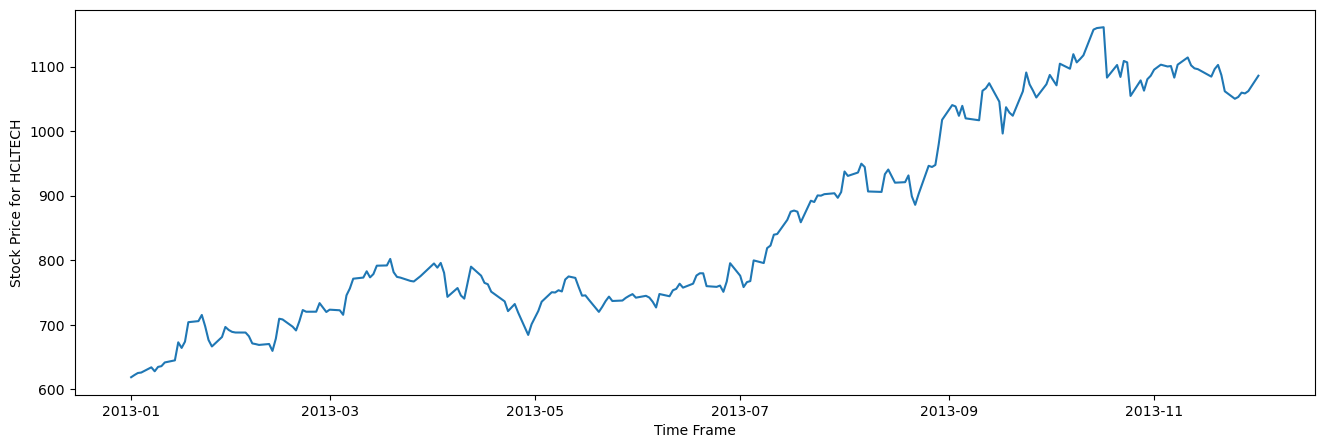

In [4]:
#Data Exploration
plt.figure(figsize=(16,5))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(HCLTechStockData)

# Checking stationarity

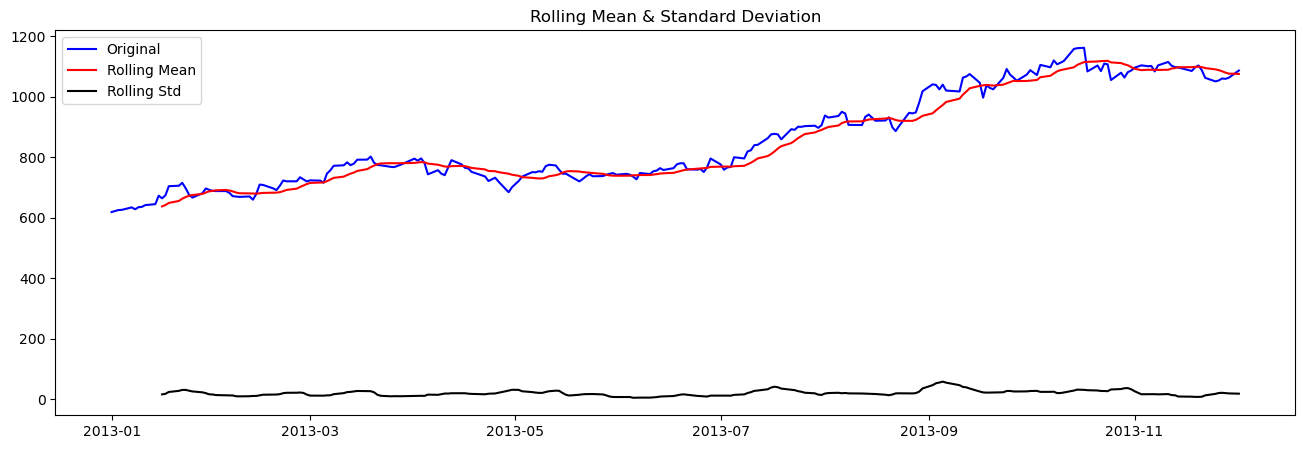

In [5]:
#Determing rolling statistics
rolLmean = HCLTechStockData.rolling(12).mean()
rolLstd = HCLTechStockData.rolling(12).std()

plt.figure(figsize=(16,5))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(HCLTechStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

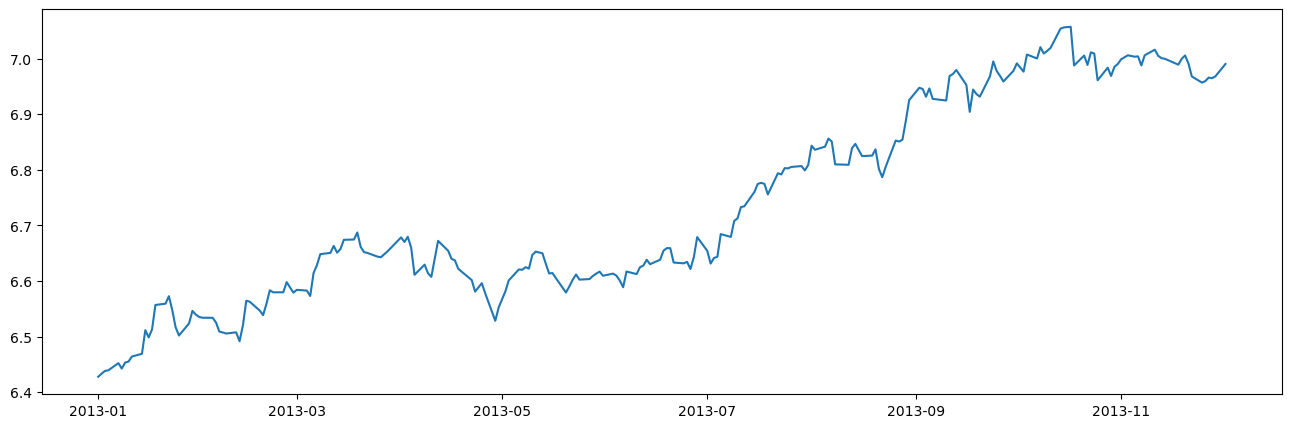

In [6]:
#Lets try transformation
plt.figure(figsize=(16,5))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData)
plt.plot(ts_log)

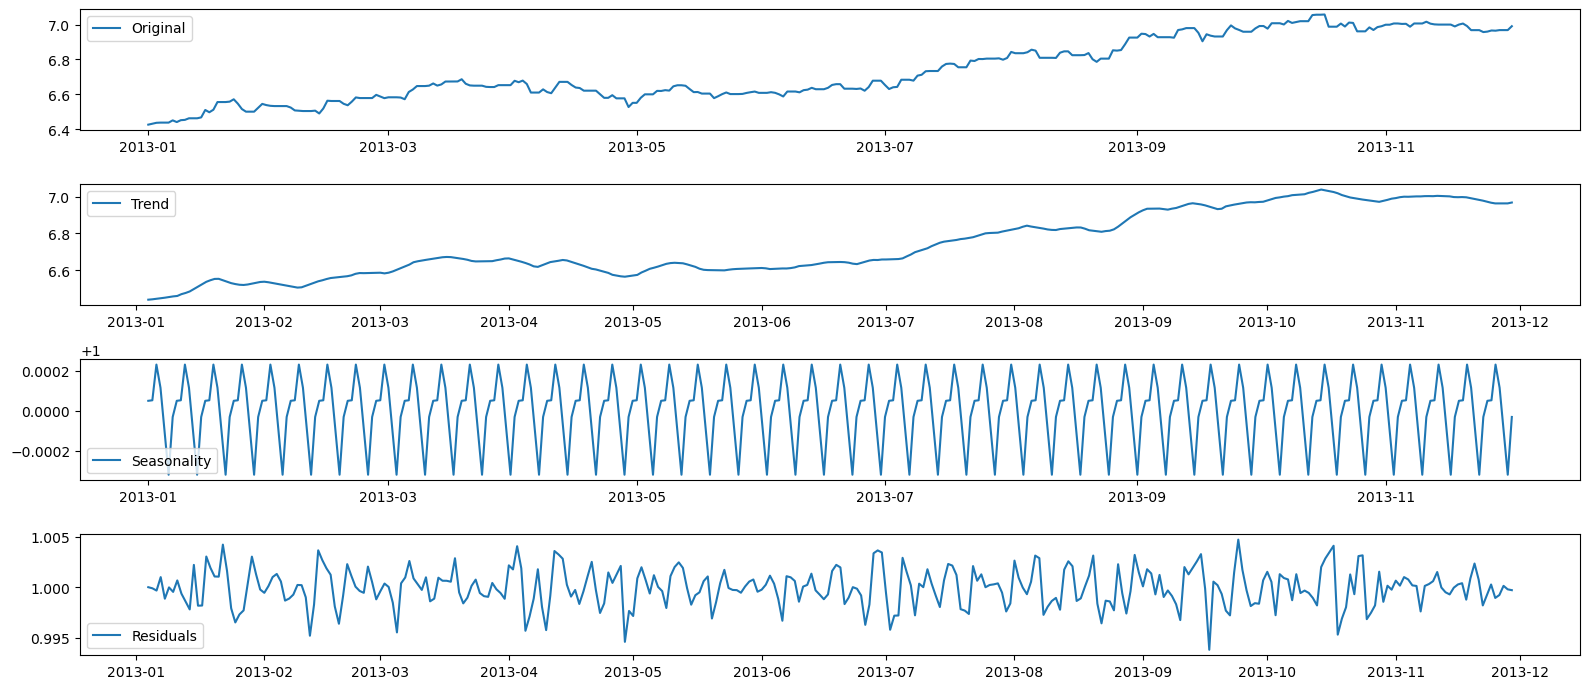

In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
ts_log = ts_log.asfreq('D')

ts_log = ts_log.ffill()

decomposition = seasonal_decompose(ts_log, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16, 7))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


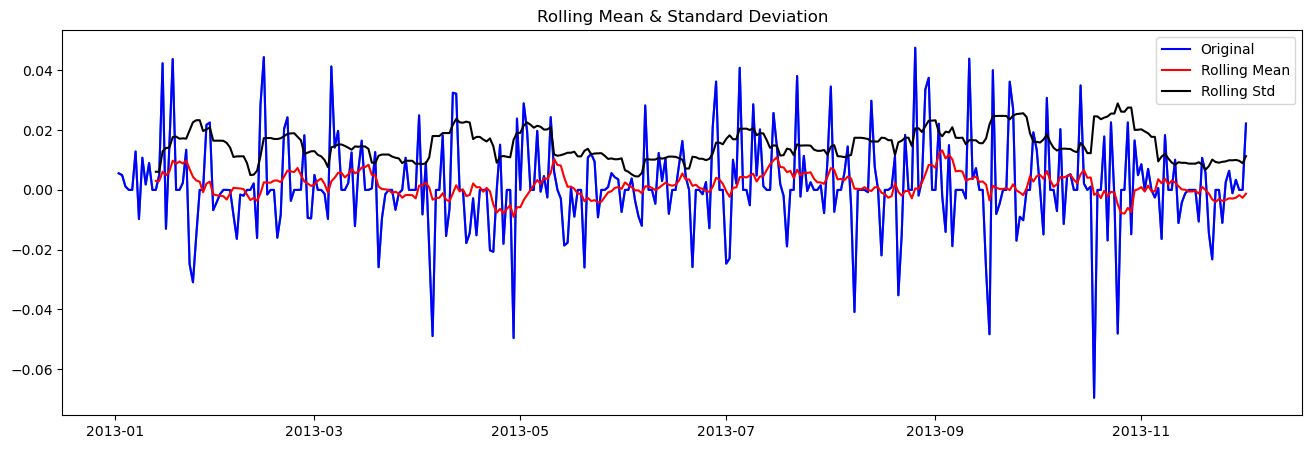

In [16]:
#Lets try differencing
plt.figure(figsize=(16,5))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [17]:
HCLTechStockData.sort_index(inplace= True)

In [18]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

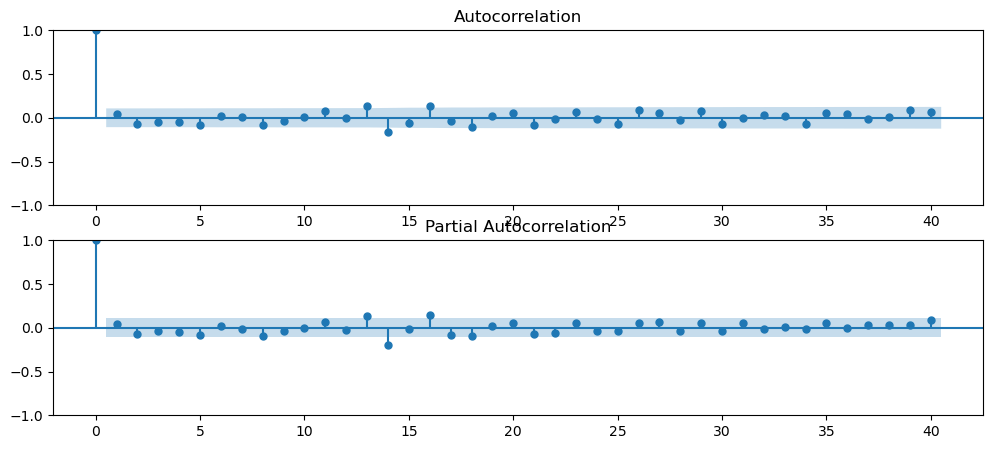

In [19]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
type(ts_log_diff)

pandas.core.series.Series

In [22]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

In [23]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


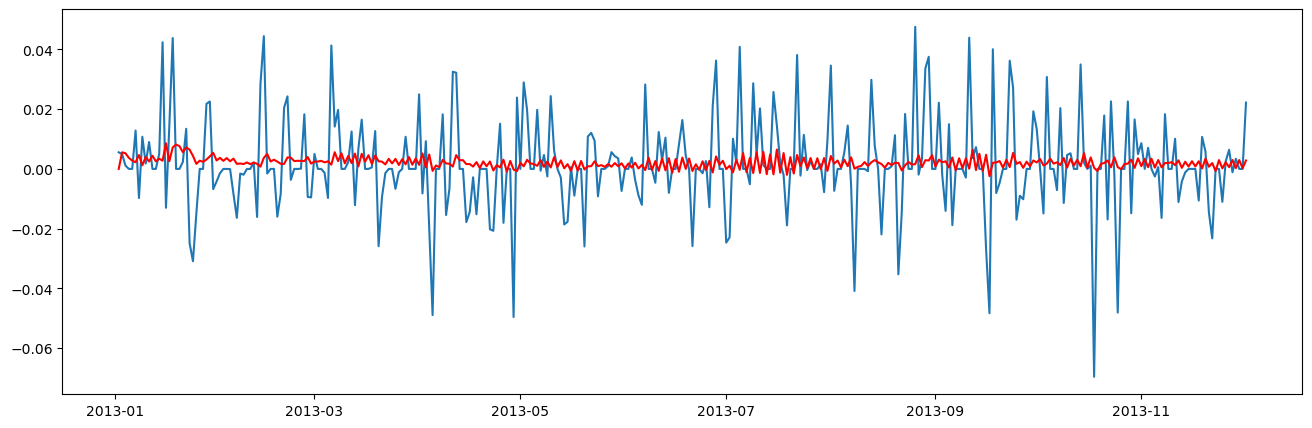

In [24]:
plt.figure(figsize=(16,5))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(2,1,2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [25]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.005246
2013-01-05    0.003721
2013-01-06    0.002774
Freq: D, dtype: float64


In [26]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.010807
2013-01-05    0.014528
2013-01-06    0.017301
Freq: D, dtype: float64


In [27]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2013-01-01    6.427621
2013-01-02    6.427621
2013-01-03    6.433181
2013-01-04    6.438427
2013-01-05    6.442148
Freq: D, dtype: float64

Text(0.5, 1.0, 'RMSE: nan')

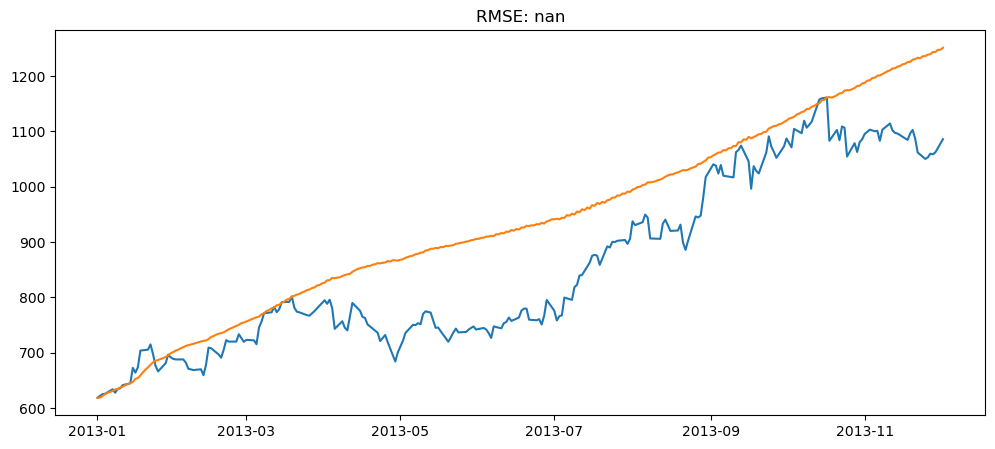

In [28]:
plt.figure(figsize=(12,5))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(HCLTechStockData)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-HCLTechStockData)**2)/len(HCLTechStockData)))

In [29]:
results_ARIMA.predict(10,20)

Date
2013-01-12    0.004414
2013-01-13    0.002540
2013-01-14    0.003434
2013-01-15    0.002742
2013-01-16    0.008597
2013-01-17    0.002565
2013-01-18    0.007188
2013-01-19    0.008163
2013-01-20    0.007629
2013-01-21    0.005613
2013-01-22    0.007173
Freq: D, Name: predicted_mean, dtype: float64

In [30]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [31]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1828.443, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1835.277, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1833.888, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1833.984, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1833.388, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1832.267, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.478 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [33]:
model_fit=model.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Prev Close   No. Observations:                  335
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 915.274
Date:                Sun, 23 Jul 2023   AIC                          -1820.547
Time:                        01:16:50   BIC                          -1801.492
Sample:                    01-02-2013   HQIC                         -1812.950
                         - 12-02-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9341      0.055    -16.938      0.000      -1.042      -0.826
ar.L2          0.0388      0.055      0.708      0.479      -0.069       0.146
ma.L1         -0.0039     12.546     -0.000      1.000     -24.594      24.586
ma.L2         -0.9961     12.503     -0.080      0.937     -25.502      23.509
sigma2         0.0002      0.003      0.080      0.936      -0.006       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                69.40
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                            -0.02
Prob(H) (two-sided):                  0.10   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
model=sm.tsa.statespace.SARIMAX(TempData['Prev Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<Axes: >

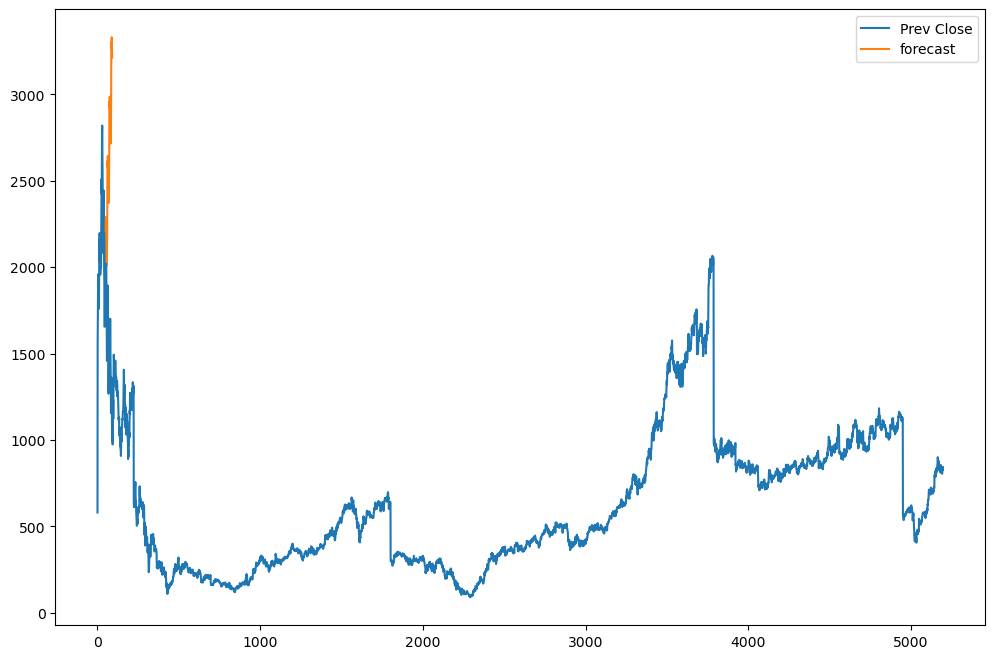

In [52]:
TempData['forecast']=results.predict(start=50,end=90,dynamic=True)
TempData[['Prev Close','forecast']].plot(figsize=(12,8))